# Лабораторна робота 2: Базові алгоритми навчання без учителя та обробка текстових даних (Scikit-learn lib)

**Викладач:** Наталія Сахненко

**Студент:** Зубко Дмитро Едуардович

In [28]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

## Завантаження даних

In [29]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [30]:
# Перетворення категоріальних змінних у числові
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = pd.Categorical(df[col]).codes

# Виводимо інформацію про датасет після перетворення
print("Інформація про датасет після перетворення:")
df.info()

Інформація про датасет після перетворення:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99982 entries, 0 to 99981
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  int8   
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  int8   
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(4), int8(2)
memory usage: 5.5 MB


In [31]:
# Розділення на групи з діабетом та без
df_diabetes = df[df['diabetes'] == 1]
df_no_diabetes = df[df['diabetes'] == 0]

# Визначення розміру меншої групи
min_size = min(len(df_diabetes), len(df_no_diabetes))

# Вибір рівної кількості зразків з обох груп
df_diabetes_sampled = df_diabetes.sample(n=min_size, random_state=42)
df_no_diabetes_sampled = df_no_diabetes.sample(n=min_size, random_state=42)

# Об'єднання вибірок
df_balanced = pd.concat([df_diabetes_sampled, df_no_diabetes_sampled])

# Перемішування даних
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced.info()
# Розділяємо ознаки та цільову змінну
X = df_balanced.drop('diabetes', axis=1)
y = df_balanced['diabetes']

# Стандартизуємо дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               17000 non-null  int8   
 1   age                  17000 non-null  float64
 2   hypertension         17000 non-null  int64  
 3   heart_disease        17000 non-null  int64  
 4   smoking_history      17000 non-null  int8   
 5   bmi                  17000 non-null  float64
 6   HbA1c_level          17000 non-null  float64
 7   blood_glucose_level  17000 non-null  int64  
 8   diabetes             17000 non-null  int64  
dtypes: float64(3), int64(4), int8(2)
memory usage: 963.0 KB


## 1. Зниження розмірності і візуалізація даних
### Застосування PCA

In [32]:
pca_full = PCA()
pca_full.fit(X_scaled)

PCA()

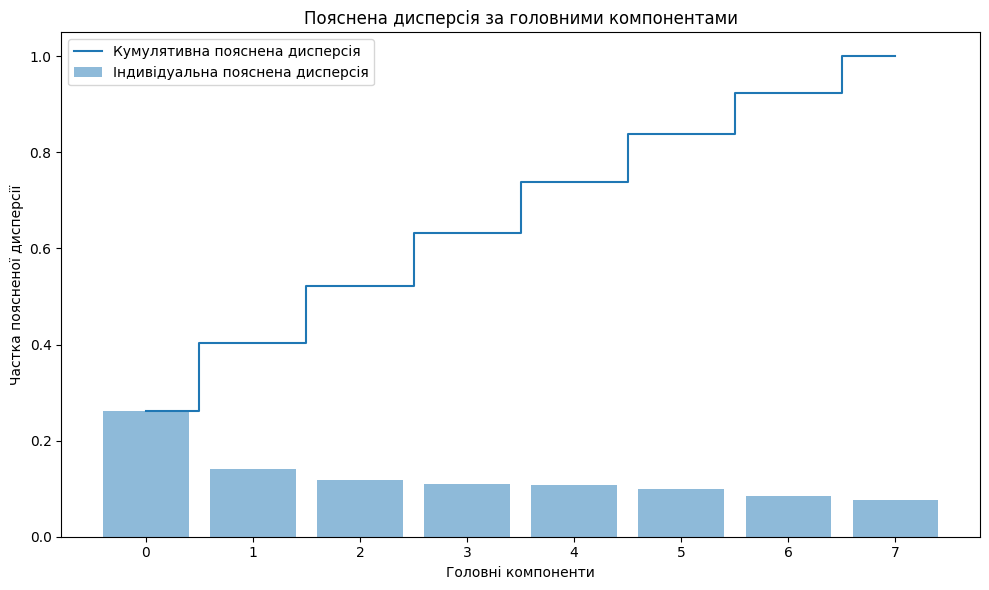

In [33]:
# Візуалізуємо пояснену дисперсію
plt.figure(figsize=(10, 6))
exp_var_pca = pca_full.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center',
        label='Індивідуальна пояснена дисперсія')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',
         label='Кумулятивна пояснена дисперсія')
plt.ylabel('Частка поясненої дисперсії')
plt.xlabel('Головні компоненти')
plt.legend(loc='best')
plt.title('Пояснена дисперсія за головними компонентами')
plt.tight_layout()
plt.show()

### PCA з 2 компонентами

In [34]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Створюємо DataFrame з результатами PCA
pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

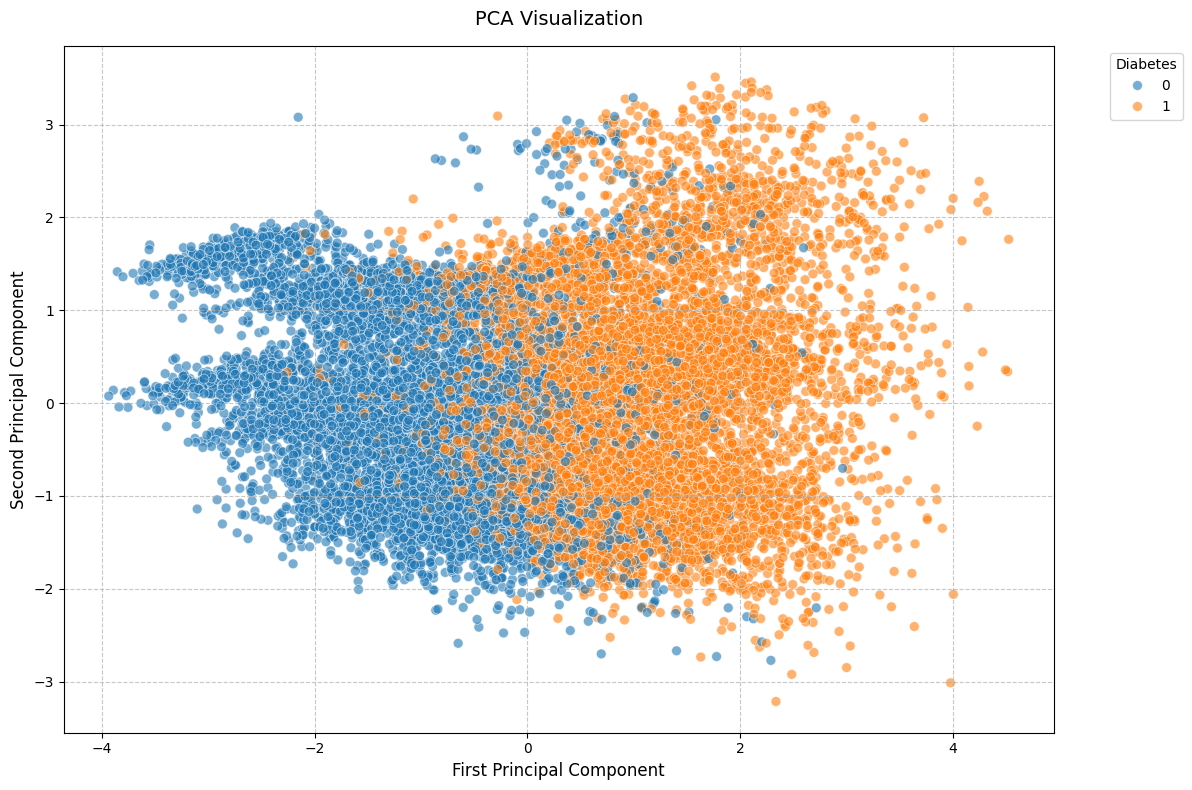

In [35]:
# Візуалізація
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca_1', y='pca_2', 
                hue='label', 
                data=pca_result_df, 
                s=50,  # Більші точки
                alpha=0.6)  # Додаємо прозорість

plt.title('PCA Visualization', fontsize=14, pad=15)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)

plt.legend(title='Diabetes', 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left',
          fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

### Застосовуємо t-SNE

In [36]:
print("\nЗастосовуємо t-SNE (це може зайняти деякий час)...")
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X_scaled)


Застосовуємо t-SNE (це може зайняти деякий час)...


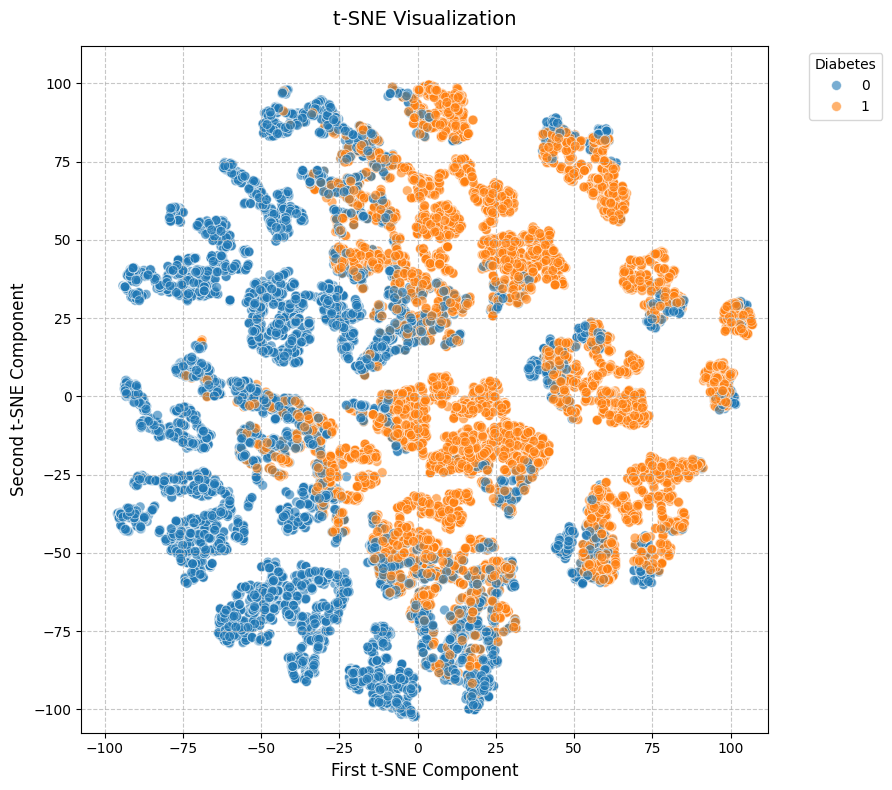

In [37]:
# Створюємо DataFrame з результатами t-SNE
tsne_result_df = pd.DataFrame({
    'tsne_1': tsne_result[:,0], 
    'tsne_2': tsne_result[:,1], 
    'label': y
})
# Візуалізація
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tsne_1', 
                y='tsne_2', 
                hue='label', 
                data=tsne_result_df,
                s=50,  # Більший розмір точок
                alpha=0.6)  # Додаємо прозорість

plt.title('t-SNE Visualization', fontsize=14, pad=15)
plt.xlabel('First t-SNE Component', fontsize=12)
plt.ylabel('Second t-SNE Component', fontsize=12)

lim = (tsne_result.min()-5, tsne_result.max()+5)
plt.xlim(lim)
plt.ylim(lim)

plt.gca().set_aspect('equal')

plt.legend(title='Diabetes',
          bbox_to_anchor=(1.05, 1),
          loc='upper left',
          fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)

# Оптимізуємо розташування елементів
plt.tight_layout()

# 2. Кластерний аналіз

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from time import time
from PIL import Image

Квантування зображення до 64 кольорів
Завершено за 0.571 секунд
Квантування зображення до 32 кольорів
Завершено за 0.568 секунд
Квантування зображення до 16 кольорів
Завершено за 0.556 секунд
Квантування зображення до 8 кольорів
Завершено за 0.520 секунд


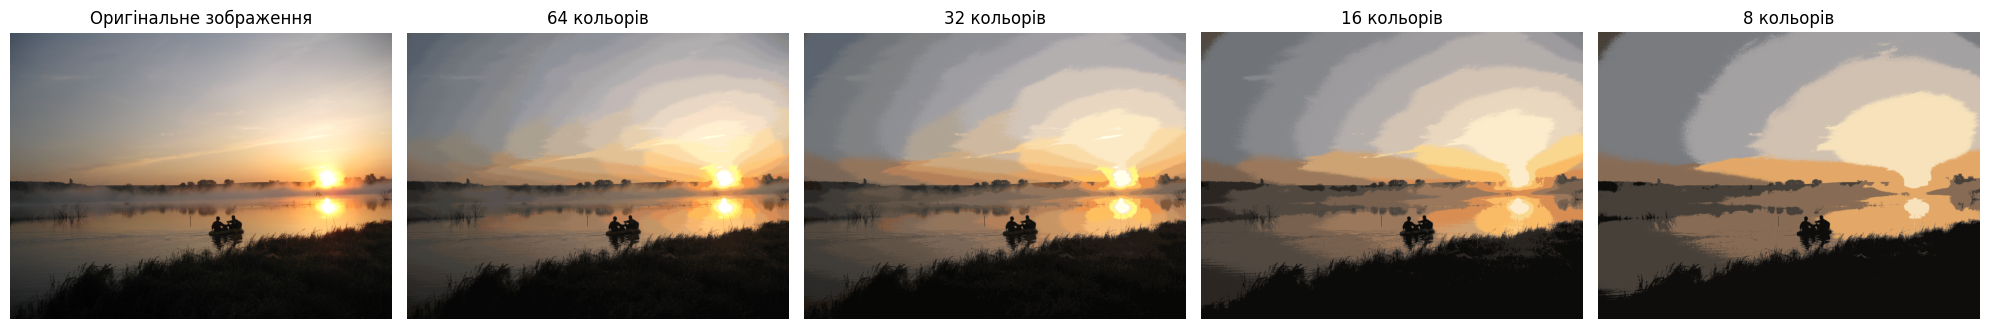

In [39]:
# Завантаження зображення
image = Image.open("lodka.jpg")
image_array = np.array(image, dtype=np.float64) / 255

# Перетворення зображення у 2D масив
w, h, d = original_shape = tuple(image_array.shape)
assert d == 3
image_array_2d = np.reshape(image_array, (w * h, d))

def quantize_image(n_colors):
    print(f"Квантування зображення до {n_colors} кольорів")
    t0 = time()
    
    # Підготовка вибірки даних
    image_array_sample = shuffle(image_array_2d, random_state=0, n_samples=1000)
    
    # Застосування k-means
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    
    # Прогнозування міток для всіх пікселів
    labels = kmeans.predict(image_array_2d)
    
    print(f"Завершено за {time() - t0:.3f} секунд")
    
    # Відновлення зображення
    quantized_image = kmeans.cluster_centers_[labels].reshape(w, h, d)
    
    return quantized_image

# Квантування зображення з різною кількістю кольорів
n_colors_list = [64, 32, 16, 8]
quantized_images = [quantize_image(n) for n in n_colors_list]

# Відображення результатів
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.imshow(image_array)
plt.title("Оригінальне зображення")
plt.axis('off')

for i, (n_colors, quantized_image) in enumerate(zip(n_colors_list, quantized_images), start=2):
    plt.subplot(1, 5, i)
    plt.imshow(quantized_image)
    plt.title(f"{n_colors} кольорів")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 3. Обробка та класифікація текстових даних

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

from wordcloud import WordCloud

In [41]:
# Завантаження даних
df = pd.read_csv("googleplaystore_user_reviews.csv")
df.shape

(37217, 5)

In [42]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [43]:
df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [44]:
from collections import Counter
Counter( df['Sentiment'])

Counter({'Positive': 23859, 'Negative': 8227, 'Neutral': 5131})

In [45]:
import re
import nltk
from nltk.corpus import stopwords

# Завантаження стоп-слів
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Перевірка на NaN
    if pd.isna(text):
        return ""
    # Переконуємося, що text є рядком
    text = str(text)
    # Видалення спеціальних символів та цифр
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # Перетворення на нижній регістр
    text = text.lower()
    # Видалення стоп-слів
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Очищення тексту
df['cleaned_review'] = df['Translated_Review'].apply(clean_text)

# Видалення рядків з порожніми відгуками після очищення
df = df[df['cleaned_review'] != ""]

print(df['cleaned_review'].head())
print(f"Кількість рядків після очищення: {len(df)}")

0    like eat delicious food thats im cooking food ...
1           help eating healthy exercise regular basis
2           works great especially going grocery store
3                                         best idea us
4                                             best way
Name: cleaned_review, dtype: object
Кількість рядків після очищення: 37158


In [46]:
def visualize(label):
    text = ' '.join(df[df['Sentiment'] == label]['cleaned_review'])
    
    # Створення словника з частотами слів
    word_freq = Counter(text.split())
    
    # Виведення 10 найчастіших слів
    print(f"10 найчастіших слів для класу {label}:")
    print(word_freq.most_common(10))
    
    # Створення та відображення wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud для {label} відгуків')
    plt.show()

10 найчастіших слів для класу Negative:
[('game', 4247), ('get', 1502), ('time', 1421), ('like', 1265), ('cant', 1079), ('even', 986), ('play', 935), ('app', 895), ('ads', 878), ('im', 833)]


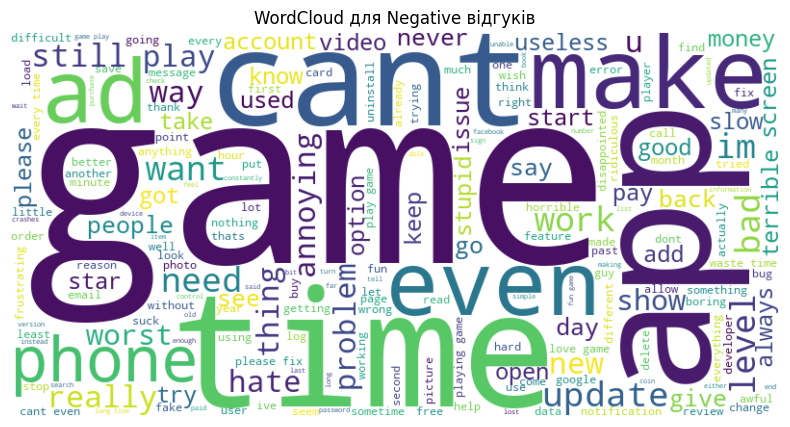

10 найчастіших слів для класу Neutral:
[('like', 426), ('cant', 421), ('work', 355), ('app', 278), ('please', 278), ('get', 265), ('time', 255), ('even', 229), ('phone', 228), ('update', 203)]


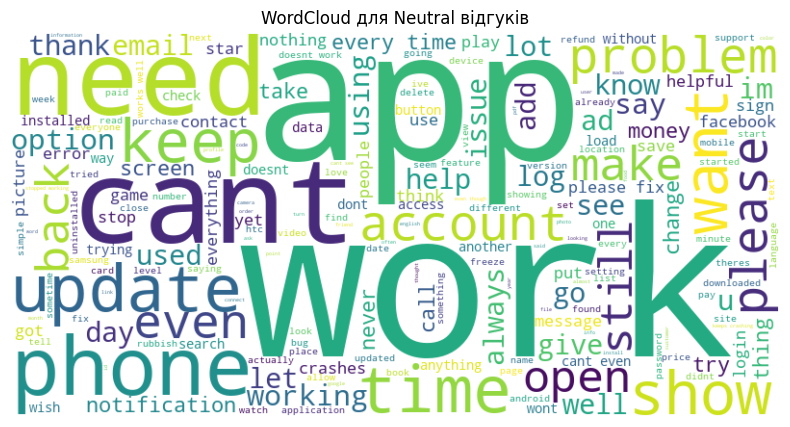

10 найчастіших слів для класу Positive:
[('game', 4918), ('good', 4802), ('great', 4498), ('love', 4210), ('like', 3759), ('app', 3552), ('get', 2930), ('time', 2782), ('would', 2553), ('really', 2385)]


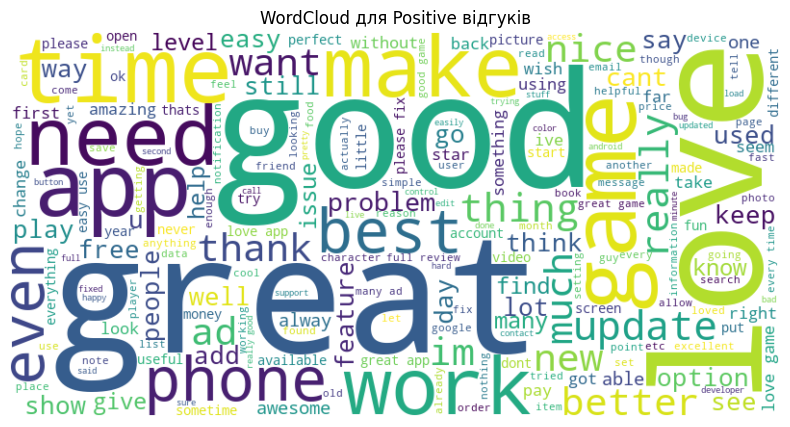

In [47]:
# Візуалізація для кожного класу
for sentiment in ['Negative', 'Neutral', 'Positive']:
    visualize(sentiment)

In [48]:
# Підготовка даних для класифікації
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['Sentiment']

# Розділення даних на тренувальну та тестову вибірки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Навчання моделі
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [50]:
# Оцінка моделі
y_pred = model.predict(X_test)
print("\nЗвіт про класифікацію:")
print(classification_report(y_test, y_pred))


Звіт про класифікацію:
              precision    recall  f1-score   support

    Negative       0.73      0.71      0.72      1644
     Neutral       0.80      0.27      0.40      1027
    Positive       0.81      0.93      0.86      4761

    accuracy                           0.79      7432
   macro avg       0.78      0.64      0.66      7432
weighted avg       0.79      0.79      0.77      7432



In [51]:
print("\nМатриця помилок:")
print(confusion_matrix(y_test, y_pred))


Матриця помилок:
[[1175   18  451]
 [ 148  275  604]
 [ 294   49 4418]]
